## Mental Health Prevalence Analysis

 Analysis of global mental health disorder prevalence rates across countries, regions, and economic groups from 1990-2019.
 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt


df = pd.read_csv('1- mental-illnesses-prevalence.csv')
df = df.rename(columns={'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia', 
                          'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depressive',
                         'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized':'Anxiety',
                         'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized':'Bipolar',
                         'Eating disorders (share of population) - Sex: Both - Age: Age-standardized':'Eating Disorder'})

mental_health_cols = ['Schizophrenia', 'Depressive', 'Anxiety', 'Bipolar', 'Eating Disorder']


df.head(10).round(3)


,Entity,Code,Year,Schizophrenia,Depressive,Anxiety,Bipolar,Eating Disorder
0,Afghanistan,AFG,1990,0.223,4.996,4.713,0.703,0.128
1,Afghanistan,AFG,1991,0.222,4.989,4.702,0.702,0.123
2,Afghanistan,AFG,1992,0.222,4.981,4.684,0.701,0.119
3,Afghanistan,AFG,1993,0.221,4.977,4.674,0.700,0.115
4,Afghanistan,AFG,1994,0.220,4.978,4.671,0.700,0.112
5,Afghanistan,AFG,1995,0.219,4.978,4.668,0.700,0.109
6,Afghanistan,AFG,1996,0.218,4.981,4.666,0.700,0.105
7,Afghanistan,AFG,1997,0.217,4.988,4.665,0.700,0.102
8,Afghanistan,AFG,1998,0.216,4.997,4.668,0.700,0.098
9,Afghanistan,AFG,1999,0.215,5.004,4.674,0.700,0.096


# Data Exploration and Overview


In [3]:
df.shape

(6420, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Entity           6420 non-null   object 
 1   Code             6150 non-null   object 
 2   Year             6420 non-null   int64  
 3   Schizophrenia    6420 non-null   float64
 4   Depressive       6420 non-null   float64
 5   Anxiety          6420 non-null   float64
 6   Bipolar          6420 non-null   float64
 7   Eating Disorder  6420 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 401.4+ KB


# Data Cleaning and Preproccesing 

avoided chained indexing (df[...][...]) due to potential unreliable behavior used .loc for safer and more predictable row/column selection.

In [5]:
null_entities = df.loc[df['Code'].isnull(),"Entity"].unique()
print(null_entities)

['Africa (IHME GBD)' 'America (IHME GBD)' 'Asia (IHME GBD)'
 'Europe (IHME GBD)' 'European Union (27)' 'High-income' 'Low-income'
 'Lower-middle-income' 'Upper-middle-income']


Avoided inplace=True since it is deprecated in pandas.
Assigned the result to a variable instead, as recommended.

In [6]:
# Remove duplicates and reset index

df.drop_duplicates()
df.reset_index(drop= True) 
df.shape

(6420, 8)

# Geographical and Economic Grouping


In [24]:

# Create mapping dictionaries for regional and economic classifications
# This allows us to separate analysis by country vs regional aggregates

region_codes = {
    "Africa (IHME GBD)": "AFR",
    "America (IHME GBD)": "AMR",
    "Asia (IHME GBD)": "ASI",
    "Europe (IHME GBD)": "EUR",
    "European Union (27)": "EU27",
}

economic_codes = {
    "High-income": "HIC",
    "Low-income": "LIC",
    "Lower-middle-income": "LMIC",
    "Upper-middle-income": "UMIC"
}

# Fill missing codes using our mapping dictionaries


df['Code'] = df['Code'].fillna(df['Entity'].map({**region_codes, **economic_codes}))

# Create separate dataframes for different analysis levels

df_regions = df.loc[df['Entity'].isin(region_codes)]
df_economy = df.loc[df['Entity'].isin(economic_codes)]

df_countries = df.loc[~df['Entity'].isin(region_codes) & 
                     ~df['Entity'].isin(economic_codes) & 
                     (df['Entity'] != 'World')]

df_world = df.loc[df["Entity"] == "World"]



In [8]:
print("Dataset Summary:")
print("Countries:", len(df_countries)//30, "| Regions:", len(df_regions)//30, "| Economic Groups:", len(df_economy)//30, "| World:", len(df_world)//30)
print("Total Records:", len(df_regions) + len(df_countries) + len(df_economy) + len(df_world))


Dataset Summary:
Countries: 204 | Regions: 5 | Economic Groups: 4 | World: 1
Total Records: 6420


## Outlier Handling
* Anxiety and Eating Disorder show the highest number of extreme values, consistent with their higher variability across countries and years.
* Schizophrenia outliers are scattered, suggesting occasional spikes rather than systematic errors.
Depressive and Bipolar have fewer outliers, indicating more stable reporting.
* Some outliers may stem from data entry errors or aggregation inconsistencies, but the majority reflect actual differences in prevalence.
* Disorders with repeated extreme values across countries or years warrant closer inspection, while those with only a few scattered outliers are less suspicious.

Conclusion: Clipping these outliers ensures trends and correlations are not skewed, while preserving meaningful patterns in mental health prevalence.

In [9]:

Q1 = df[mental_health_cols].quantile(0.25)
Q3 = df[mental_health_cols].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


# Apply outlier clipping to preserve data integrity
df[mental_health_cols] = df[mental_health_cols].clip(lower=lower, upper=upper, axis=1)



# Descriptive Statistics - Country Level Analysis

This provides a stable baseline for comparing countries by removing yearly fluctuations


In [10]:

# Country 
countries_stats = df_countries.groupby('Entity')[mental_health_cols].mean()

print("Years:", df_countries["Year"].min(), "-", df_countries["Year"].max())
countries_stats.describe().round(3)


Years: 1990 - 2019


,Schizophrenia,Depressive,Anxiety,Bipolar,Eating Disorder
count,204.000,204.000,204.000,204.000,204.000
mean,0.266,3.767,4.100,0.639,0.195
std,0.039,0.934,1.059,0.236,0.139
min,0.190,1.555,2.011,0.182,0.047
25%,0.242,3.052,3.434,0.521,0.098
50%,0.273,3.652,3.954,0.579,0.144
75%,0.285,4.338,4.519,0.857,0.241
max,0.449,7.143,7.909,1.497,0.890


# Global Trends Analysis
Depression and anxiety are more common globally, while schizophrenia, bipolar, and eating disorders are rarer and stable.

In [11]:

global_stats = df_world[mental_health_cols].agg(["mean","min","max"]).T

global_stats["Range"] = global_stats["min"].round(3).astype(str) + " - " + global_stats["max"].round(3).astype(str)

final_stats = global_stats[["mean", "Range"]].rename(columns={"mean": "Global Average"}).round(2)

final_stats



,Global Average,Range
Schizophrenia,0.29,0.287 - 0.29
Depressive,3.51,3.41 - 3.597
Anxiety,3.79,3.746 - 3.846
Bipolar,0.49,0.487 - 0.49
Eating Disorder,0.16,0.151 - 0.174



# Country Rankings
What are the highest schizophrenia rates in 2019?


In [12]:
max_schizophrenia = df_countries.loc[df_countries["Year"] == 2019, ["Schizophrenia", "Year", "Entity"]].sort_values(by= "Schizophrenia", ascending = False)
max_schizophrenia.head(10)


,Schizophrenia,Year,Entity
6089,0.433649,2019,United States
389,0.388646,2019,Australia
4079,0.388614,2019,New Zealand
2309,0.375738,2019,Greenland
4049,0.367969,2019,Netherlands
2789,0.352672,2019,Ireland
2369,0.327207,2019,Guam
6299,0.323551,2019,Vietnam
5159,0.319195,2019,Singapore
1199,0.317761,2019,Chile


# What are the lowest schizophrenia rates in 2019?

In [13]:
min_schizophrenia = df_countries.loc[df_countries["Year"] == 2019, ["Schizophrenia", "Year", "Entity"]].sort_values(by= "Schizophrenia", ascending = True)
min_schizophrenia.head(10)


,Schizophrenia,Year,Entity
5279,0.188416,2019,Somalia
1139,0.191388,2019,Central African Republic
989,0.200413,2019,Burundi
3449,0.201840,2019,Malawi
6419,0.202482,2019,Zimbabwe
2459,0.203762,2019,Guinea-Bissau
3899,0.203936,2019,Mozambique
1559,0.204357,2019,Democratic Republic of Congo
3209,0.204727,2019,Lesotho
3239,0.207027,2019,Liberia


# What are the highest depression rates in 2019?


In [14]:

#2019 yılındaki en yüksek depresyon oranı hangi ülkelere ait ?
max_depressive = df_countries.loc[df_countries["Year"] == 2019, ["Entity","Depressive", "Year"]].sort_values(by= "Depressive", ascending= False)
max_depressive.head(10)



,Entity,Depressive,Year
5969,Uganda,6.584519,2019
4439,Palestine,6.198952,2019
1139,Central African Republic,5.923847,2019
2309,Greenland,5.835712,2019
239,Angola,5.744194,2019
1829,Equatorial Guinea,5.728945,2019
2129,Gabon,5.545971,2019
1319,Congo,5.525741,2019
3209,Lesotho,5.511564,2019
2159,Gambia,5.501879,2019


# What are the lowest depression rates in 2019?


In [15]:
min_depressive = df_countries.loc[df_countries["Year"] == 2019, ["Depressive", "Year","Entity"]].sort_values(by= "Depressive", ascending= True)

min_depressive.head(10)


,Depressive,Year,Entity
899,1.603124,2019,Brunei
5159,2.008132,2019,Singapore
5339,2.091181,2019,South Korea
2909,2.103280,2019,Japan
3929,2.193303,2019,Myanmar
4559,2.211669,2019,Peru
1259,2.219628,2019,Colombia
4619,2.277957,2019,Poland
299,2.407510,2019,Argentina
2699,2.418471,2019,Indonesia


# Yearly Averages

In [16]:
# This reveals whether mental health issues are increasing, decreasing, or stable globally

yearly_avg = df_countries.groupby('Year')[mental_health_cols].mean()

yearly_avg_pd = pd.DataFrame(yearly_avg)

yearly_avg_pd


,Schizophrenia,Depressive,Anxiety,Bipolar,Eating Disorder
Year,,,,,
1990,0.264818,3.820203,4.067651,0.638144,0.182281
1991,0.264870,3.816992,4.067959,0.638146,0.182272
1992,0.264908,3.814272,4.068373,0.638155,0.182368
1993,0.264934,3.811904,4.068774,0.638169,0.182555
1994,0.264944,3.810239,4.069255,0.638193,0.182833
1995,0.264936,3.809248,4.069536,0.638213,0.183158
1996,0.264896,3.810085,4.070058,0.638222,0.183628
1997,0.264827,3.813439,4.071442,0.638224,0.184284
1998,0.264756,3.817253,4.073482,0.638231,0.185058


In [17]:
yearly_avg_pd.corr()


,Schizophrenia,Depressive,Anxiety,Bipolar,Eating Disorder
Schizophrenia,1.000000,-0.978925,0.971144,0.834446,0.986039
Depressive,-0.978925,1.000000,-0.965047,-0.813338,-0.968721
Anxiety,0.971144,-0.965047,1.000000,0.719078,0.970037
Bipolar,0.834446,-0.813338,0.719078,1.000000,0.855325
Eating Disorder,0.986039,-0.968721,0.970037,0.855325,1.000000


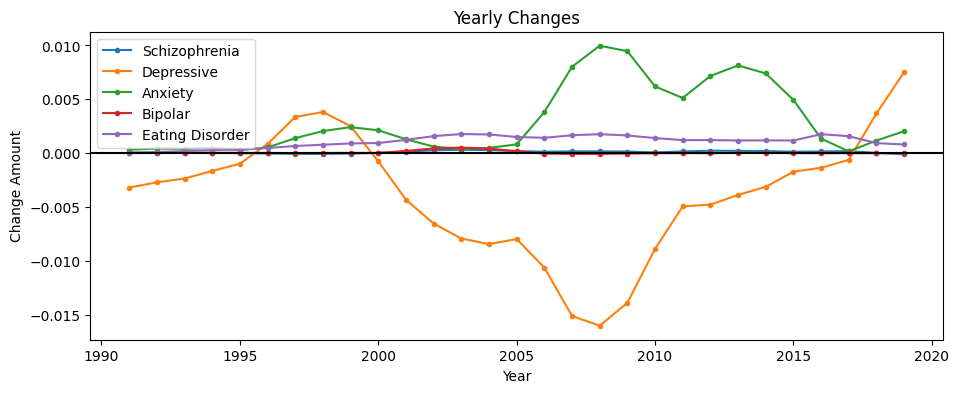

In [18]:

yearly_diff = yearly_avg.diff() #ülkeler için 

plt.figure(figsize=(11,4))

for col in yearly_diff.columns:
    plt.plot(yearly_diff.index, yearly_diff[col], marker='.', label=col)

plt.axhline(0, color='black')  # artış/azalışı görmek için 0 çizgisi
plt.title("Yearly Changes")
plt.xlabel('Year')
plt.ylabel("Change Amount")
plt.legend()
plt.show()


In [19]:
print("Toplam kaç yıl disorderlar artıştaydı?:")
for disorder in mental_health_cols:
    print(f" 30 yılda {disorder}: {(yearly_diff[disorder] > 0).sum()} yıl artıştı bulundu" )

Toplam kaç yıl disorderlar artıştaydı?:
 30 yılda Schizophrenia: 23 yıl artıştı bulundu
 30 yılda Depressive: 6 yıl artıştı bulundu
 30 yılda Anxiety: 29 yıl artıştı bulundu
 30 yılda Bipolar: 17 yıl artıştı bulundu
 30 yılda Eating Disorder: 28 yıl artıştı bulundu


In [20]:
''' Yorum:
Pozitif korelasyonlar (0.8–0.98)
Schizophrenia ↔ Anxiety, Eating Disorder → birlikte artıyor
Eating Disorder ↔ Anxiety → birlikte artıyor
Negatif korelasyonlar (~-0.96)
Depressive ↔ diğerleri → Depressive azalırken diğerleri artmış
Bipolar → orta düzey pozitif, ama diğerlerine göre daha stabil
'''

' Yorum:\nPozitif korelasyonlar (0.8–0.98)\nSchizophrenia ↔ Anxiety, Eating Disorder → birlikte artıyor\nEating Disorder ↔ Anxiety → birlikte artıyor\nNegatif korelasyonlar (~-0.96)\nDepressive ↔ diğerleri → Depressive azalırken diğerleri artmış\nBipolar → orta düzey pozitif, ama diğerlerine göre daha stabil\n'

In [21]:
def plot_avg_mental_health(df, group_col, title):
   
    avg = df.groupby(group_col)[mental_health_cols].mean()
    avg.plot(kind="bar", figsize=(10,4))
    plt.title(f"Average Mental Health Rates by {title}")
    plt.ylabel("Share of Population")
    plt.xticks(rotation=0)
    plt.show()

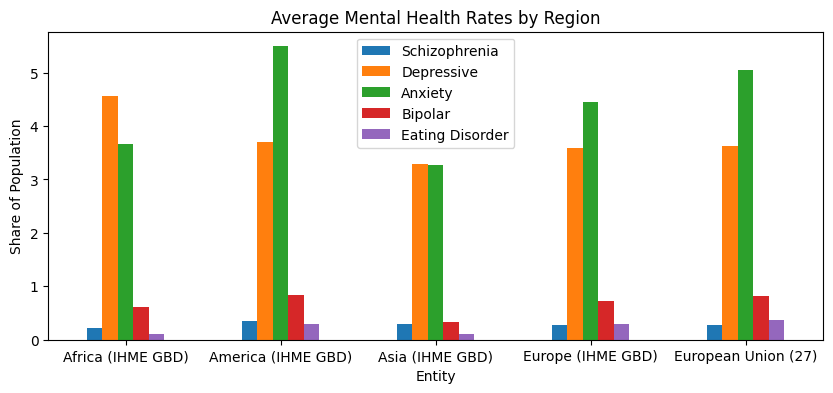

In [22]:
plot_avg_mental_health(df_regions, "Entity", "Region")

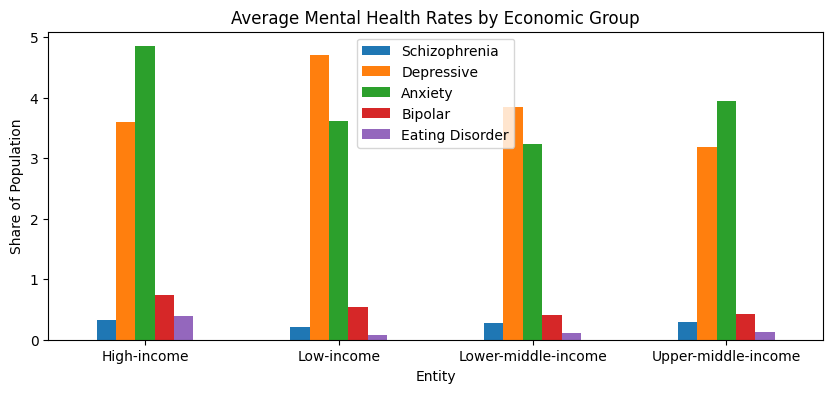

In [23]:
plot_avg_mental_health(df_economy, "Entity", "Economic Group")